In [49]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import time 
import pandas as pd

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [/Users/xanderpolny1/.wdm/drivers/chromedriver/mac64/100.0.4896.60/chromedriver] found in cache


In [50]:
url = 'https://www.rottentomatoes.com/browse/dvd-streaming-all?minTomato=0&maxTomato=100&services=amazon;hbo_go;itunes;netflix_iw;vudu;amazon_prime;fandango_now&genres=1;2;4;5;6;8;9;10;11;13;18;14&sortBy=release'
browser.visit(url)

In [51]:
for i in range(601):
    browser.find_by_xpath('//*[@id="show-more-btn"]/button').click()
    time.sleep(1)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=100.0.4896.60)
Stacktrace:
0   chromedriver                        0x00000001013db3d9 chromedriver + 5104601
1   chromedriver                        0x000000010136bbf3 chromedriver + 4647923
2   chromedriver                        0x0000000100f5cb48 chromedriver + 392008
3   chromedriver                        0x0000000100f3d13c chromedriver + 262460
4   chromedriver                        0x0000000100fb2c1b chromedriver + 744475
5   chromedriver                        0x0000000100fc16ff chromedriver + 804607
6   chromedriver                        0x0000000100faf5b3 chromedriver + 730547
7   chromedriver                        0x0000000100f85139 chromedriver + 557369
8   chromedriver                        0x0000000100f86165 chromedriver + 561509
9   chromedriver                        0x000000010139a39d chromedriver + 4838301
10  chromedriver                        0x00000001013b2cde chromedriver + 4938974
11  chromedriver                        0x00000001013b7b5e chromedriver + 4959070
12  chromedriver                        0x00000001013b394a chromedriver + 4942154
13  chromedriver                        0x000000010138f33c chromedriver + 4793148
14  chromedriver                        0x00000001013cd3b8 chromedriver + 5047224
15  chromedriver                        0x00000001013cd53f chromedriver + 5047615
16  chromedriver                        0x00000001013e2705 chromedriver + 5134085
17  libsystem_pthread.dylib             0x00007fff203d68fc _pthread_start + 224
18  libsystem_pthread.dylib             0x00007fff203d2443 thread_start + 15


In [38]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

'<html lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">\n <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">\n  <script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/all.js?hash=fc530caee6d89c22f6e576a767b025db">\n  </script>\n  <script async="" src="https://sb.scorecardresearch.com/beacon.js">\n  </script>\n  <script async="" crossorigin="anonymous" integrity="sha384-/lfxU6PNOSdu+yg5CQ6Bqs112JrNtnIi8akxhIvAwfYc7bAJg4scSN/mdhay2j5Y" src="https://www.gstatic.com/recaptcha/releases/gZWLhEUEJFxEhoT5hpjn2xHK/recaptcha__en.js" type="text/javascript">\n  </script>\n  <script async="" src="//www.googletagmanager.com/gtm.js?id=GTM-TW7ZFZ">\n  </script>\n  <script async="" src="https://honorableland.com/v2xglf05UGcVvzEUFlB6672D6fDwhuTsalYNh9J8Q6zzvZToUzEeznRfzQK-ELINP">\n  </script>\n  <script src="https://fandangollc.demdex.net/event?d_nsid=0&amp;d_ld=_ts%3D16487850142
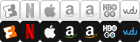

In [39]:
soup.prettify()

In [5]:
movie_list = soup.find_all("div",class_="mb-movie")

In [6]:
len (movie_list)

32

In [9]:
movie_list[0].find("h3",class_="movieTitle").text

'Hurt'

In [11]:
movie_list[0].find("span",class_="tMeterScore").text

'67%'

In [12]:
movie_list[0]

<div class="mb-movie"><div class="poster_container"><a href="/m/hurt_2021" rel="noopener noreferrer" target="_blank"><img alt="Hurt" class="poster" src="https://resizing.flixster.com/g9KhgX4xQwQdZqapCqI4cclrnP4=/130x0/v1.bTsxMzk5MTQ2NTtqOzE5MTUxOzEyMDA7NzIwMDsxMDgwMA"/></a></div><div class="movie_info"><a href="/m/hurt_2021" rel="noopener noreferrer" target="_blank"><h3 class="movieTitle">Hurt</h3><div><span class="tMeterIcon tiny"><span class="icon tiny fresh"></span><!-- react-text: 238 --> <!-- /react-text --><span class="tMeterScore"><!-- react-text: 240 -->67<!-- /react-text --><!-- react-text: 241 -->%<!-- /react-text --></span></span></div><p class="release-date"><!-- react-text: 243 -->Available <!-- /react-text --><!-- react-text: 244 -->Dec 10<!-- /react-text --></p></a></div></div>

In [13]:
movie_list[0].find("p",class_="release-date").text

'Available Dec 10'

In [15]:
movie_list[0].find("a")["href"]

'/m/hurt_2021'

In [16]:
title = []
score = []
month_day = []
year = []
for movie in movie_list:
    title.append(movie.find("h3",class_="movieTitle").text)
    score.append(movie.find("span",class_="tMeterScore").text)
    month_day.append(movie.find("p",class_="release-date").text)
    year.append(movie.find("a")["href"])

In [29]:
data={
    "Title":title,
    "Score":score,
    "Month_Day":month_day,
    "Year":year
}
movies_df=pd.DataFrame(data)

In [30]:
movies_df

,Title,Score,Month_Day,Year
0,Hurt,67%,Available Dec 10,/m/hurt_2021
1,Benedetta,86%,Available Dec 21,/m/benedetta
2,Last Words,40%,Available Dec 17,/m/last_words
3,Death of a Telemarketer,13%,Available Dec 3,/m/death_of_a_telemarketer
4,Maybe This Year,78%,Available Dec 7,/m/maybe_this_year
5,A Cops and Robbers Story,67%,Available Jan 14,/m/a_cops_and_robbers_story
6,Try Harder!,97%,Available Dec 24,/m/try_harder
7,President,92%,Available Feb 18,/m/president_2021
8,The Scary of Sixty-First,57%,Available Dec 24,/m/the_scary_of_sixty_first
9,Wheel of Fortune and Fantasy,99%,Available Jan 11,/m/wheel_of_fortune_and_fantasy
